# Healthcare

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.set_printoptions()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Dataset Description


* Pregnancies--	Number of times pregnant
* Glucose--	Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure--	Diastolic blood pressure (mm Hg)
* SkinThickness--	Triceps skinfold thickness (mm)
* Insulin--	Two hour serum insulin
* BMI--	Body Mass Index
* DiabetesPedigreeFunction--	Diabetes pedigree function
* Age--	Age in years
* Outcome--	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### To Predict Whether A Person has Diabetes or No

## Importing the data and Performing Some Analysis

In [2]:
data=pd.read_csv("health care diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("The dataset has {0} rows and {1} columns".format(*data.shape))

The dataset has 768 rows and 9 columns


In [4]:
print(f"The dataset has {data.isnull().sum().sum()} missing values")

The dataset has 0 missing values


The Dataset has  no null values

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The main thing to note from the summary statistics. The mean of all columns is almost equal to the median meaning it forms a normal distribution.Let's plot and see the columns.

In [6]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


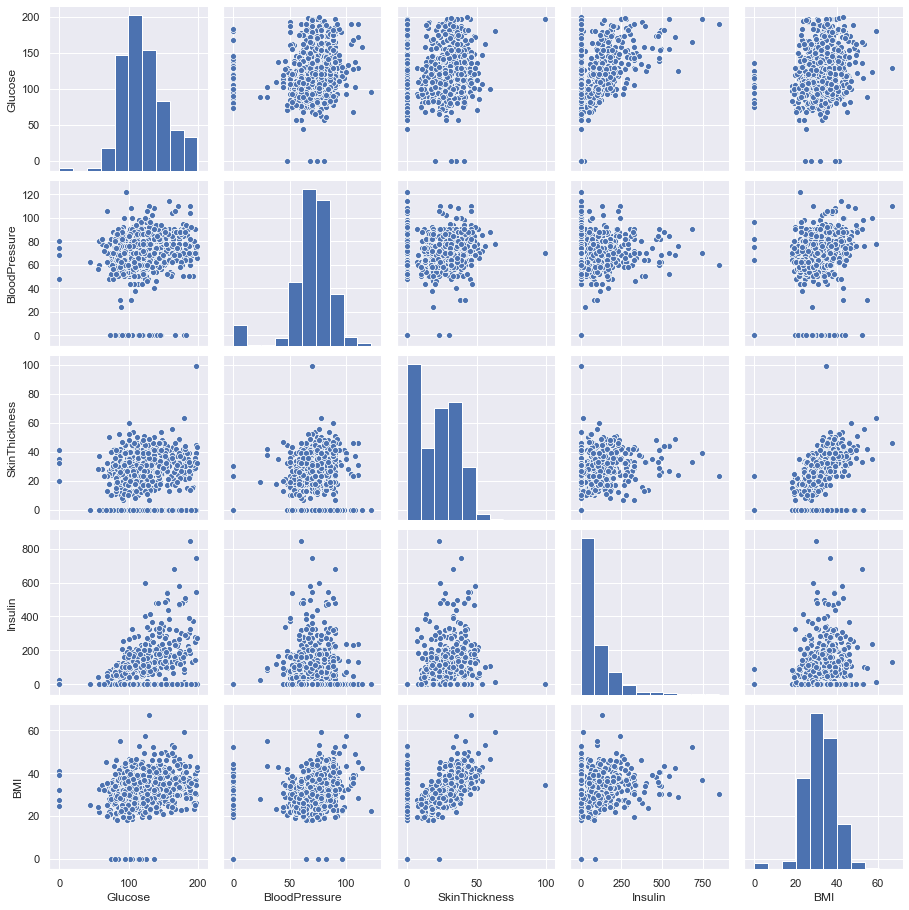

In [8]:
sns.pairplot(data,vars=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"])

In [9]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

we can see the insulin column is positive skewed and has some outliers

## Exploratory Data Analysis

We will compare each variable with each other to get the relationship between them.

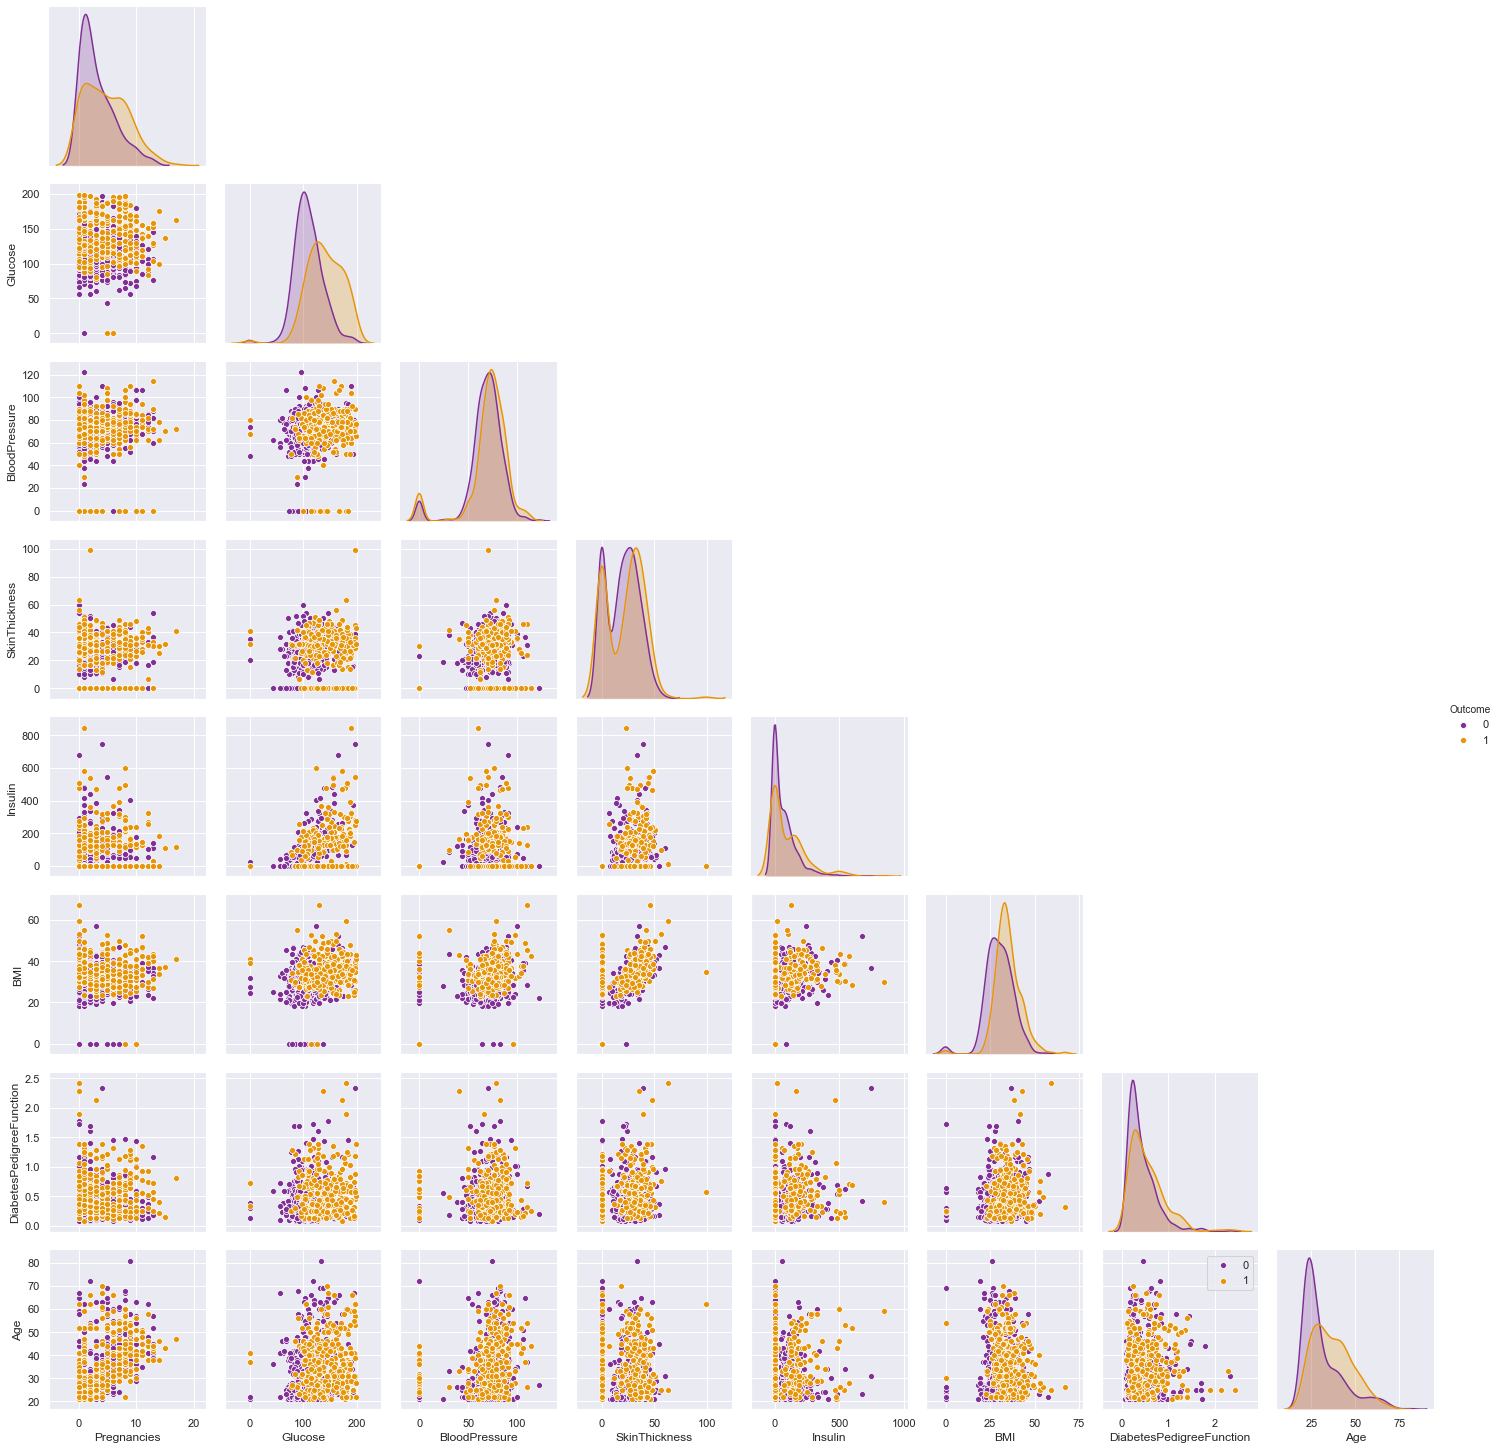

In [10]:
sns.pairplot(data,hue="Outcome",palette="CMRmap",corner=True)
plt.legend()

From the above pair plot we can see that each variable explains something in the Outcome variable.

From the Heatmap we can see that there is no high correlation between the independent variables.

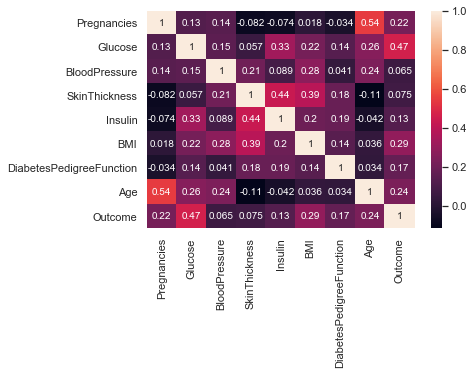

In [11]:
sns.heatmap(data.corr(),annot=True)

## Data Modeling

First we find the accuracy and compare it with other models

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [13]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]
x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=7,test_size=0.2)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
print(f"The Train Accuracy for KNN Model {knn.score(x_train,y_train)}")
y_predict_knn=knn.predict(x_valid)
print(f"The Test Accuracy for KNN Model {accuracy_score(y_valid,y_predict_knn)}")

The Train Accuracy for KNN Model 0.7996742671009772
The Test Accuracy for KNN Model 0.7077922077922078


### Grid Search CV and Stratified CV

We are using Grid Search to find the best parameter of the model.In the previous model we have got a test accuracy of 70% without applying any parameters,we have used Hold Out CV in the previous model.But the data can be biased so we use Stratified K Fold Cross Validation.  

The Use of Stratified K Fold:
* we have an imbalanced dataset.This CV helps us to  have equal proportion of diabetic and Non-diabetic patients.
* It separates the data  into different fold for training and testing. 

In [15]:
grid_parameter_knn={'n_neighbors':list(range(1,100,2)),'weights':["uniform","distance"],
                "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
                "metric":["euclidean","manhattan"]}
gs_knn=GridSearchCV(KNeighborsClassifier(),grid_parameter_knn,cv=5)
gs_result_knn=gs_knn.fit(x_train,y_train)
print(f"The best parameters are {gs_result_knn.best_params_}")

The best parameters are {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'distance'}


In [16]:
knn1=KNeighborsClassifier(algorithm= 'auto',metric= 'manhattan', n_neighbors= 35, weights= 'distance')
stf=StratifiedKFold(n_splits=5)
scores_knn=[]
for train,test in stf.split(x,y):
    x_train1,x_test_knn=x.iloc[train,:],x.iloc[test,:]
    y_train1,y_test_knn=y[train],y[test]
    knn1.fit(x_train1,y_train1)
    ypred_knn=knn1.predict(x_test_knn)
    scores_knn.append(accuracy_score(y_test_knn,ypred_knn))
print(f"The Mean Test Score After applying Grid Search and Stratified KFOld {np.mean(scores_knn)}")

The Mean Test Score After applying Grid Search and Stratified KFOld 0.7604702487055428


We will compare the accuracy of KNN Model with other classification Algorithms.
* Logistic Regression
* Decision Tree
* Support Vector Machine

In [17]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
print(f"The Train Accuracy for Decision Tree Model {dec.score(x_train,y_train)}")
y_predict_dec=dec.predict(x_valid)
print(f"The Test Accuracy for Decision Tree Model {accuracy_score(y_valid,y_predict_dec)}")

The Train Accuracy for Decision Tree Model 1.0
The Test Accuracy for Decision Tree Model 0.7207792207792207


In [19]:
grid_parameter_dec={"criterion":["gini", "entropy"],"splitter":["best","random"]}
gs_dec=GridSearchCV(DecisionTreeClassifier(),grid_parameter_dec,cv=5)
gs_result_dec=gs_dec.fit(x_train,y_train)

print(f"The best parameters are {gs_result_dec.best_params_}")

The best parameters are {'criterion': 'entropy', 'splitter': 'best'}


In [20]:
dec1=DecisionTreeClassifier(criterion= 'entropy', splitter= 'best')
stf=StratifiedKFold(n_splits=5)
scores_dec=[]
for train,test in stf.split(x,y):
    x_train1,x_test_dec=x.iloc[train,:],x.iloc[test,:]
    y_train1,y_test_dec=y[train],y[test]
    dec1.fit(x_train1,y_train1)
    ypred_dec=dec1.predict(x_test_dec)
    scores_dec.append(accuracy_score(y_test_dec,ypred_dec))
print(f"The Mean Test Score  after applying Best parameters and Stratified KFold {np.mean(scores_dec)}")

The Mean Test Score  after applying Best parameters and Stratified KFold 0.6875562346150581


In [21]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print(f"The Train Accuracy for Logistic Regression Model {log.score(x_train,y_train)}")
y_predict_log=log.predict(x_valid)
print(f"The Test Accuracy for Logistic Regression Model {accuracy_score(y_valid,y_predict_log)}")

The Train Accuracy for Logistic Regression Model 0.7785016286644951
The Test Accuracy for Logistic Regression Model 0.7922077922077922


In [23]:
grid_parameter_log={"C":[0.001,0.01,0.1,1,10,100],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs_log=GridSearchCV(LogisticRegression(),grid_parameter_log,cv=5)
gs_result_log=gs_log.fit(x_train,y_train)


print(f"The best parameters are {gs_result_log.best_params_}")

The best parameters are {'C': 1, 'solver': 'newton-cg'}


In [24]:
log1=LogisticRegression(C=1,solver="newton-cg")
stf=StratifiedKFold(n_splits=5)
scores_log=[]
for train,test in stf.split(x,y):
    x_train1,x_test_log=x.iloc[train,:],x.iloc[test,:]
    y_train1,y_test_log=y[train],y[test]
    log1.fit(x_train1,y_train1)
    ypred_log=log1.predict(x_test_log)
    scores_log.append(accuracy_score(y_test_log,ypred_log))

print(f"The Mean Test Score  after applying Best parameters and Stratified KFold {np.mean(scores_log)}")

The Mean Test Score  after applying Best parameters and Stratified KFold 0.7721925133689839


In [25]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
print(f"The Train Accuracy for SVM Model {svc.score(x_train,y_train)}")
y_predict_svc=svc.predict(x_valid)
print(f"The Test Accuracy for SVM Model {accuracy_score(y_valid,y_predict_svc)}")

The Train Accuracy for SVM Model 0.7654723127035831
The Test Accuracy for SVM Model 0.7727272727272727


In [27]:
grid_parameter_svc={"C":[0.1, 1, 10],'kernel':['linear', 'rbf'],
                   'gamma':[0.1, 1,]}
gs_svc=GridSearchCV(SVC(),grid_parameter_svc)
gs_result_svc=gs_svc.fit(x_train,y_train)
gs_result_svc.best_params_

print(f"The best parameters are {gs_result_svc.best_params_}")

The best parameters are {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


In [28]:
svc1=SVC(C=1,kernel="linear",gamma=0.1,probability=True)
stf=StratifiedKFold(n_splits=5)
scores_svc=[]
for train,test in stf.split(x,y):
    x_train1,x_test_svc=x.iloc[train,:],x.iloc[test,:]
    y_train1,y_test_svc=y[train],y[test]
    svc1.fit(x_train1,y_train1)
    ypred_svc=svc1.predict(x_test_svc)
    scores_svc.append(accuracy_score(y_test_svc,ypred_svc))
np.mean(scores_svc)

print(f"The Mean Test Score  after applying Best parameters and Stratified KFold {np.mean(scores_svc)}")

The Mean Test Score  after applying Best parameters and Stratified KFold 0.7656820303879128


From the Below Heatmap we can compare the Accuracy of Different Models. 

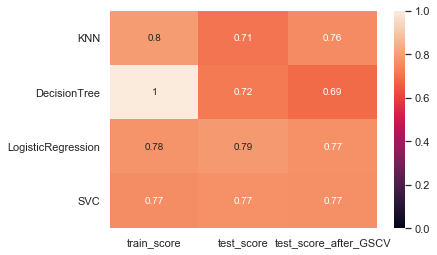

In [29]:
score_data=pd.DataFrame()
score_data["train_score"]=[knn.score(x_train,y_train),dec.score(x_train,y_train),log.score(x_train,y_train),
                          svc.score(x_train,y_train)]
score_data["test_score"]=[accuracy_score(y_valid,y_predict_knn),accuracy_score(y_valid,y_predict_dec),
                           accuracy_score(y_valid,y_predict_log),accuracy_score(y_valid,y_predict_svc)]
score_data["test_score_after_GSCV"]=[np.mean(scores_knn),np.mean(scores_dec),np.mean(scores_log),np.mean(scores_svc)]
score_data.index=["KNN","DecisionTree","LogisticRegression","SVC"]
sns.heatmap(score_data,annot=True,vmin=0,vmax=1)

### Accuracy Metrics

In this model we are predicting whether a person has a Diabetes or Not.Two errors will occur in this classification.
* Type 1 Error(also known as False Positives) 
* Type 2 Error (also known as False Negatives)

In Our Model:
* (Actual,Predicted)
* (0,0)=Non Diabetes,Non Diabetes=True Positives
* (0,1)=Non Diabetes,Diabetes=False Negatives
* (1,0)=Diabetes,Non Diabetes=False Positives
* (1,1)=Diabetes,Diabetes=True Negatives

So in our problem the Type 1 Error (also known as False Positives) is more serious,since we can classify a person who is not diabetic as diabetic but classifying a person as non diabetic who is actually diabetic is more serious.
so more than accuracy of the model we must reduce the False Positives

we find the Area Under Curve (AUC) score and plot the ROC Curve (Receiver Operating Characteristics).
* ROC curve is relationship between TPR(y_axis) and FPR(x_axis)

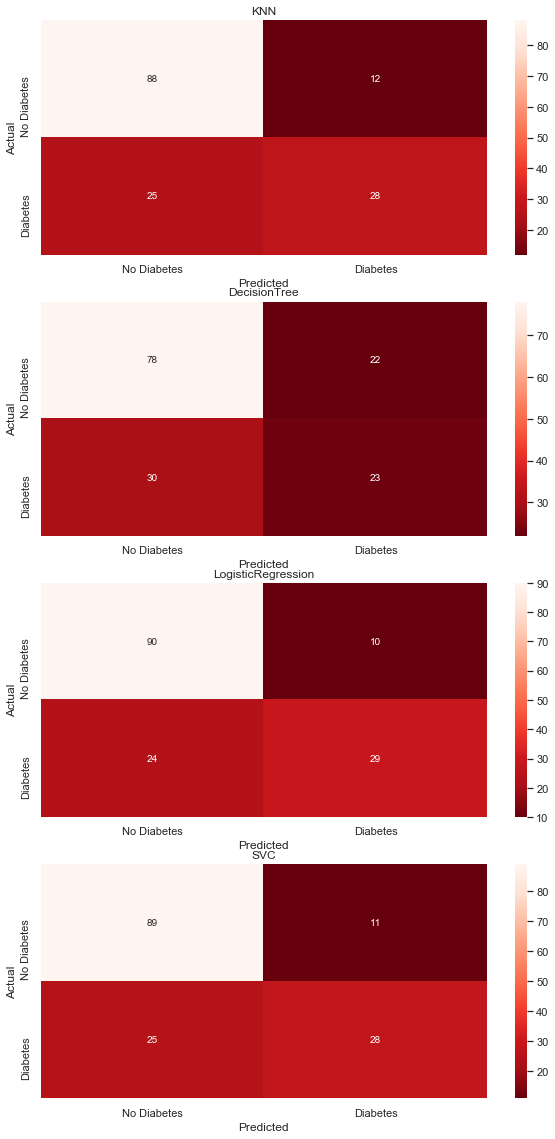

In [30]:
test_cm=[y_test_knn,y_test_dec,y_test_log,y_test_svc]
pred_cm=[ypred_knn,ypred_dec,ypred_log,ypred_svc]

z=list(range(1,5))
plt.figure(figsize=(10,25))
for i,j,k,g in zip(test_cm,pred_cm,z,score_data.index):
    plt.subplot(5,1,k)
    sns.heatmap(confusion_matrix(i,j,labels=(0,1)),annot=True,cmap="Reds_r",
    xticklabels=["No Diabetes","Diabetes"],yticklabels=["No Diabetes","Diabetes"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(g);

In [31]:
for i,j,z in zip(test_cm,pred_cm,score_data.index):
     print(f"The False Postives for {z} is {confusion_matrix(i,j)[1,0]}")
    

The False Postives for KNN is 25
The False Postives for DecisionTree is 30
The False Postives for LogisticRegression is 24
The False Postives for SVC is 25


In [32]:
no_skill_prob=[0 for _ in range(len(y_test_knn))]
knn_prob=knn1.predict_proba(x_test_knn)[:,1]
log_prob=log1.predict_proba(x_test_log)[:,1]
dec_prob=dec1.predict_proba(x_test_dec)[:,1]
svc_prob=svc1.predict_proba(x_test_svc,)[:,1]



No Skill: ROC AUC=0.500
KNN: ROC AUC=0.807
LOG: ROC AUC=0.845
DEC: ROC AUC=0.607
SVC: ROC AUC=0.841


Text(0, 0.5, 'TPR')

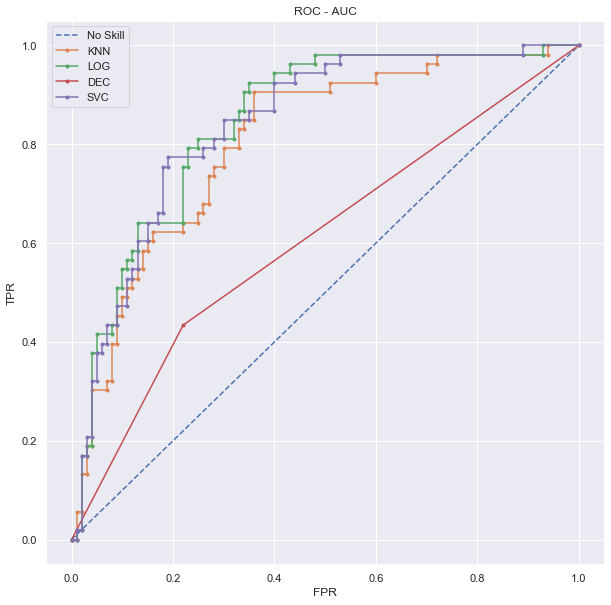

In [33]:
# calculate scores
ns_auc = roc_auc_score(y_test_knn, no_skill_prob)
knn_auc = roc_auc_score(y_test_knn,knn_prob)
log_auc = roc_auc_score(y_test_log,log_prob)
dec_auc = roc_auc_score(y_test_dec,dec_prob)
svc_auc = roc_auc_score(y_test_svc,svc_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (0.5))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('LOG: ROC AUC=%.3f' % (log_auc))
print('DEC: ROC AUC=%.3f' % (dec_auc))
print('SVC: ROC AUC=%.3f' % (svc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_knn, no_skill_prob)
knn_fpr, knn_tpr, _ = roc_curve(y_test_knn, knn_prob)
log_fpr, log_tpr, _ = roc_curve(y_test_log,log_prob)
dec_fpr, dec_tpr, _ = roc_curve(y_test_dec,dec_prob)
svc_fpr, svc_tpr, _ = roc_curve(y_test_svc,svc_prob)
# plot the roc curve for the model
plt.figure(figsize=(10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(log_fpr, log_tpr, marker='.', label='LOG')
plt.plot(dec_fpr, dec_tpr, marker='.', label='DEC')
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC')

plt.legend()
plt.title("ROC - AUC")
plt.xlabel("FPR")
plt.ylabel("TPR")

In order to reduce the false positives we can reduce the cut off score to reduce the False Positives and select the Best Model. 

In [34]:
test_1=[1 if i>0.3 else 0 for i in log1.predict_proba(x_test_log)[:,1]]
test_2=[1 if i>0.3 else 0 for i in knn1.predict_proba(x_test_knn)[:,1]]
test_3=[1 if i>0.3 else 0 for i in svc1.predict_proba(x_test_svc)[:,1]]

In [35]:
#Logistic Regression
cm1=confusion_matrix(y_test_log,test_1)
ac1=(cm1[0,0]+cm1[1,1])/np.sum(cm1)
print(f"The Confusion Matrix ",cm1,sep="\n")
print("The Accuarcy Score",ac1,sep="\n")
print(classification_report(y_test_log,test_1))

The Confusion Matrix 
[[73 27]
 [10 43]]
The Accuarcy Score
0.7581699346405228
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       100
           1       0.61      0.81      0.70        53

    accuracy                           0.76       153
   macro avg       0.75      0.77      0.75       153
weighted avg       0.79      0.76      0.76       153



In [36]:
cm2=confusion_matrix(y_test_knn,test_2)
ac2=(cm2[0,0]+cm2[1,1])/np.sum(cm2)
print(f"The Confusion Matrix ",cm2,sep="\n")
print("The Accuarcy Score",ac2,sep="\n")
print(classification_report(y_test_knn,test_2))

The Confusion Matrix 
[[60 40]
 [ 5 48]]
The Accuarcy Score
0.7058823529411765
              precision    recall  f1-score   support

           0       0.92      0.60      0.73       100
           1       0.55      0.91      0.68        53

    accuracy                           0.71       153
   macro avg       0.73      0.75      0.70       153
weighted avg       0.79      0.71      0.71       153



In [37]:
cm3=confusion_matrix(y_test_svc,test_3)
ac3=(cm3[0,0]+cm3[1,1])/np.sum(cm3)
print(f"The Confusion Matrix ",cm3,sep="\n")
print("The Accuarcy Score",ac3,sep="\n")
print(classification_report(y_test_svc,test_3))

The Confusion Matrix 
[[72 28]
 [11 42]]
The Accuarcy Score
0.7450980392156863
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       100
           1       0.60      0.79      0.68        53

    accuracy                           0.75       153
   macro avg       0.73      0.76      0.73       153
weighted avg       0.77      0.75      0.75       153

